# Usual Package Imports

In [2]:
import networkx as nx, numpy as np, matplotlib.pyplot as plt, re, yaml,sys, shelve
from datetime import datetime,date
from collections import defaultdict
from functools import reduce
from importlib import reload
today = re.sub('-','_',str(date.today()))
today

'2020_04_27'

# Change Directory - Revise for your file system.

In [3]:
s = %pwd
if not re.search('Downloads$',s):
    %cd Downloads

C:\Users\nlgun\Downloads


## Open a shelve and load a graph and a term dictionary

In [74]:
with shelve.open('definitions') as f:
    graphdict = dict([(k,v) for k,v in f.items()])
graph,termdict,termdefdict = [graphdict[k] for k in 'graph term_dictionary termdefdict'.split()]
list(graphdict.keys())

['graph', 'term_dictionary', 'termdefdict']

In [76]:
print(termdefdict['Senior Reduction Amount'])

Senior Reduction Amount: Related Definitions The "Senior Reduction Amount" with respect to any Payment Date and Loan Group is either: (A) if any of the Minimum Credit Enhancement Test and the Delinquency Test for such Loan Group is not satisfied, the sum of: (i) the Senior Percentage of the Scheduled Principal for such Payment Date and Loan Group; (ii) 100% of the Unscheduled Principal for such Payment Date and Loan Group; and (iii) 100% of the Recovery Principal for such Payment Date and Loan Group; or (B) if the Minimum Credit Enhancement Test and the Delinquency Test for such Loan Group are satisfied, the sum of: (i) the Senior Percentage of the Scheduled Principal for such Payment Date and Loan Group; (ii) the Senior Percentage of the Unscheduled Principal for such Payment Date and Loan Group; and (iii) 100% of the Recovery Principal for such Payment Date and Loan Group.
	Payment Date: Payments on the Notes will be made by the Global Agent on the twenty-fifth (25th) day of each mon

In [5]:
g = graph.copy()
len(g)

192

## Test the Graph

In [6]:
g.in_edges('Senior Reduction Amount')

InEdgeDataView([('Payment Date', 'Senior Reduction Amount'), ('Recovery Principal', 'Senior Reduction Amount'), ('Unscheduled Principal', 'Senior Reduction Amount'), ('Scheduled Principal', 'Senior Reduction Amount'), ('Minimum Credit Enhancement Test', 'Senior Reduction Amount'), ('Delinquency Test', 'Senior Reduction Amount')])

In [7]:
[(edge[0],termdict[edge[0]]) for edge in g.in_edges('Senior Reduction Amount')]

[('Payment Date',
  [(555,
    'Payments on the Notes will be made by the Global Agent on the twenty-fifth (25th) day of each month (or, if such day is not a Business Day, then on the next succeeding Business Day) beginning in March 2016 (each, a "Payment Date").'),
   (1712,
    'Payments Payments on the Notes will be made by the Global Agent, as paying agent, on the twenty-fifth (25th) day of each month (or, if such day is not a Business Day, then on the next succeeding Business Day), beginning in March 2016 (each, a "Payment Date"), to the persons in whose names such Notes are registered as of the close of business on the immediately preceding Business Day in the case of Book-Entry Notes and as of the close of business on the last day of the preceding month of such Payment Date in the case of Definitive Notes (the "Record Date").')]),
 ('Recovery Principal',
  [(1836,
    '"Recovery Principal" with respect to any Payment Date and Loan Group is the sum of: (i) the excess, if any, of 

In [8]:
g0= nx.DiGraph()
g0.add_edges_from(g.in_edges("Recovery Principal"))

In [9]:
def draw_g(g,sz = (20,20)):
    plt.figure(1,figsize=sz)
    nx.draw_networkx(g)
    plt.show()

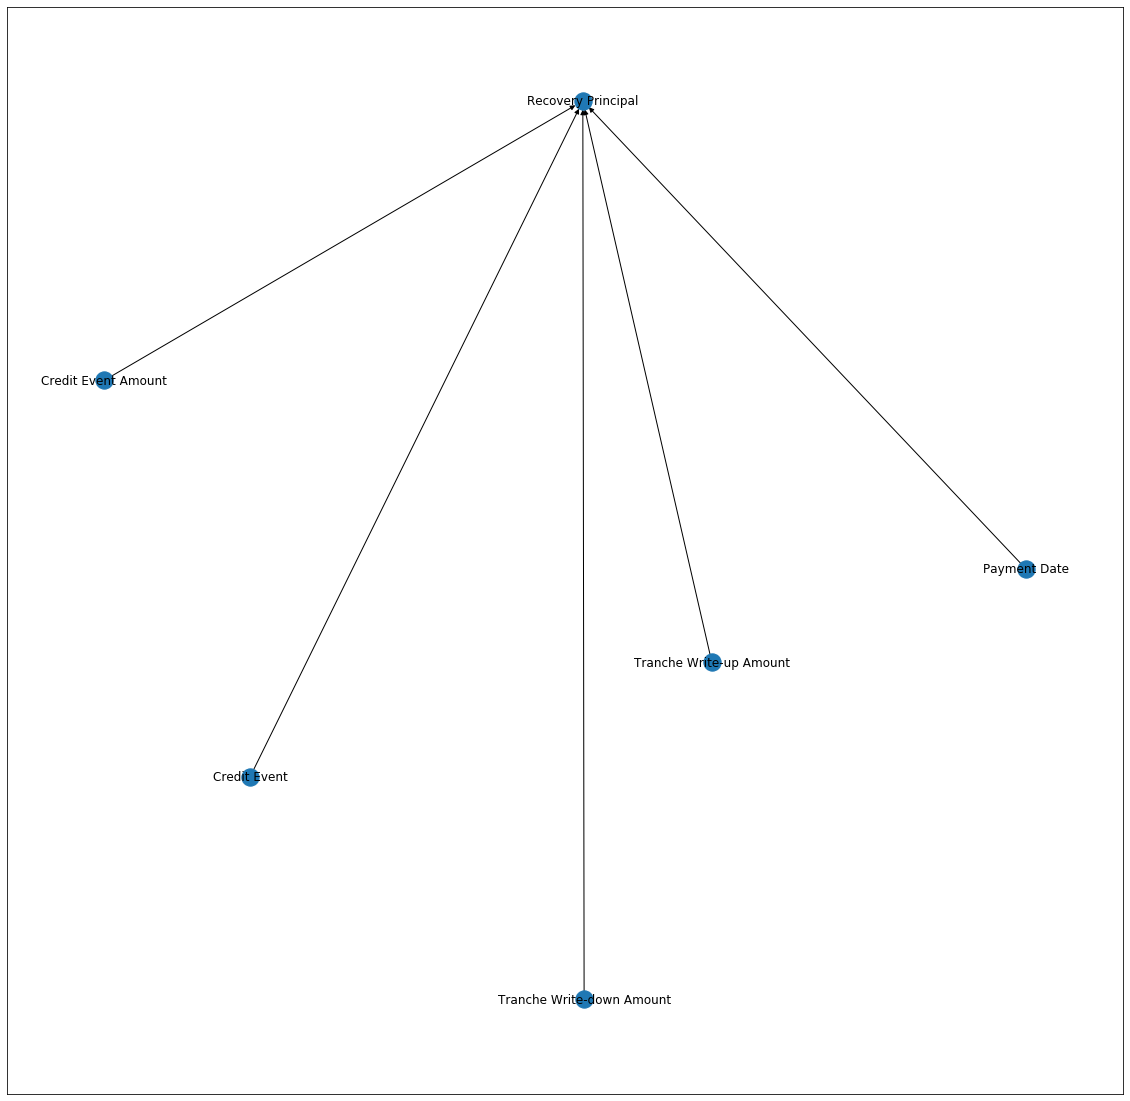

In [10]:
draw_g(g0)

In [11]:
g.in_edges('Tranche Write-up Amount')

InEdgeDataView([('Payment Date', 'Tranche Write-up Amount'), ('Principal Loss Amount', 'Tranche Write-up Amount'), ('Principal Recovery Amount', 'Tranche Write-up Amount')])

# Import our Custom Code for Tracing Back Definitions through other Definitions

In [12]:
import graphutils
reload(graphutils)
gutils = graphutils.GraphUtils

## Test Traceback

In [13]:
ar = []
term, term0 = 'Tranche Write-up Amount;Senior Reduction Amount'.split(';')
lst = lambda x: ar.append(x)
lg = gutils.traceback(g.copy(),term,num=5,it=0,f=lst)
print(len(lg.edges()),len(g.edges()),len(g.in_edges('Tranche Write-up Amount')))
#lg = gutils.traceback(g.copy(),'Senior Reduction Amount',num=3)
#draw_g(lg)
g.in_edges(term0),termdict[term0]

66 761 3


(InEdgeDataView([('Payment Date', 'Senior Reduction Amount'), ('Recovery Principal', 'Senior Reduction Amount'), ('Unscheduled Principal', 'Senior Reduction Amount'), ('Scheduled Principal', 'Senior Reduction Amount'), ('Minimum Credit Enhancement Test', 'Senior Reduction Amount'), ('Delinquency Test', 'Senior Reduction Amount')]),
 [(1823,
   'Related Definitions The "Senior Reduction Amount" with respect to any Payment Date and Loan Group is either: (A) if any of the Minimum Credit Enhancement Test and the Delinquency Test for such Loan Group is not satisfied, the sum of: (i) the Senior Percentage of the Scheduled Principal for such Payment Date and Loan Group; (ii) 100% of the Unscheduled Principal for such Payment Date and Loan Group; and (iii) 100% of the Recovery Principal for such Payment Date and Loan Group; or (B) if the Minimum Credit Enhancement Test and the Delinquency Test for such Loan Group are satisfied, the sum of: (i) the Senior Percentage of the Scheduled Principal f

In [14]:
ar.sort()
ar

[(0, 'Payment Date'),
 (0, 'Principal Loss Amount'),
 (0, 'Principal Recovery Amount'),
 (1, 'Book-Entry Notes'),
 (1, 'Business Day'),
 (1, 'Credit Event'),
 (1, 'Credit Event Net Gain'),
 (1, 'Credit Event Net Loss'),
 (1, 'Credit Event Reference Obligation'),
 (1, 'Definitive Notes'),
 (1, 'Liquidation Proceeds'),
 (1, 'Modification Loss Amount'),
 (1, 'Net Liquidation Proceeds'),
 (1, 'Period'),
 (1, 'Record Date'),
 (1, 'Reference Obligations'),
 (1, 'Reporting Period'),
 (1, 'Warrant'),
 (2, 'Clearstream'),
 (2, 'Credit Event UPB'),
 (2, 'Current Accrual Rate'),
 (2, 'Cut-off Date'),
 (2, 'Euroclear'),
 (2, 'Group Termination Date'),
 (2, 'Mortgage Insurance Credit Amount'),
 (2, 'Note Owners'),
 (2, 'Reference Pool'),
 (2, 'Treasury'),
 (2, 'Wells Fargo'),
 (2, 'Wells Fargo Bank'),
 (3, 'Barclays'),
 (3, 'BofA Merrill'),
 (3, 'Citigroup'),
 (3, 'Clearstream International'),
 (3, 'Credit Suisse'),
 (3, 'Dealer'),
 (3, 'Dealer Agreement'),
 (3, 'Dealers'),
 (3, 'Euroclear Particip

In [15]:
dlm = (': ',', ','\n') # various delimiters for use in string formation

In [16]:
term,termdict[term]

('Tranche Write-up Amount',
 [(1876,
   'Related Definitions The "Tranche Write-up Amount" with respect to any Payment Date and Loan Group is the excess, if any, of the Principal Recovery Amount for such Payment Date and Loan Group over the Principal Loss Amount for such Payment Date and Loan Group.')])

# A General Recursive Method

In [36]:
def decf(f,newargs_,cum = None,num=2, it = 0): # newargs_ is a function
    # that makes new arguments from args.
    cum = cum or [] # cum is the accumulation of the recurion
    def f_(*args,num=num,it=it):
        #print('args',args)
        cum.append(f(*args))
        if it <= num:
            newargs = newargs_(*args)
            for args in newargs:
                f_(*args,num=num,it=it+1)
    return f_,cum
func,cum = decf(lambda x: x, lambda x: ([x+1],))
print(cum)
func(0)
cum 

[]


[0, 1, 2, 3]

In [37]:
cum

[0, 1, 2, 3]

## Turn a definition into a string

In [38]:
get_def = lambda term,line=False,g=g,dct = termdict: dlm[0].join((term, dlm[-1].join((tpl[1] for tpl in dct[term]))))
def get_defs(term,line=False,g=g,num=1,it=0,dct = termdict):
    get_def(term)
get_def(term,1)

'Tranche Write-up Amount: Related Definitions The "Tranche Write-up Amount" with respect to any Payment Date and Loan Group is the excess, if any, of the Principal Recovery Amount for such Payment Date and Loan Group over the Principal Loss Amount for such Payment Date and Loan Group.'

## Indent the definition string

In [39]:
get_def_indent = lambda x,indent=0: '\t'*indent + get_def(x)
get_def_indent(term,2)

'\t\tTranche Write-up Amount: Related Definitions The "Tranche Write-up Amount" with respect to any Payment Date and Loan Group is the excess, if any, of the Principal Recovery Amount for such Payment Date and Loan Group over the Principal Loss Amount for such Payment Date and Loan Group.'

In [40]:
get_def('Tranche Write-up Amount', line=1)

'Tranche Write-up Amount: Related Definitions The "Tranche Write-up Amount" with respect to any Payment Date and Loan Group is the excess, if any, of the Principal Recovery Amount for such Payment Date and Loan Group over the Principal Loss Amount for such Payment Date and Loan Group.'

## Using the recursion to write an indented dictionary of terms

In [56]:
# using the recursion 
# need to have access to the cumulation 
func,cum = decf(get_def_indent,lambda term,it: ([indedge[0],it+1]
                for indedge in g.in_edges(term)))
print(cum)
func(term,0)
cum[:5]

[]


['Tranche Write-up Amount: Related Definitions The "Tranche Write-up Amount" with respect to any Payment Date and Loan Group is the excess, if any, of the Principal Recovery Amount for such Payment Date and Loan Group over the Principal Loss Amount for such Payment Date and Loan Group.',
 '\tPayment Date: Payments on the Notes will be made by the Global Agent on the twenty-fifth (25th) day of each month (or, if such day is not a Business Day, then on the next succeeding Business Day) beginning in March 2016 (each, a "Payment Date").\nPayments Payments on the Notes will be made by the Global Agent, as paying agent, on the twenty-fifth (25th) day of each month (or, if such day is not a Business Day, then on the next succeeding Business Day), beginning in March 2016 (each, a "Payment Date"), to the persons in whose names such Notes are registered as of the close of business on the immediately preceding Business Day in the case of Book-Entry Notes and as of the close of business on the las

In [65]:
# using the recursion 
# need to have access to the cumulation 
func,cum = decf(get_def_indent,lambda term,it: ([indedge[0],it+1]
                for indedge in g.in_edges(term)),num=0)
func(term,0)
print('\n'.join(cum))

Tranche Write-up Amount: Related Definitions The "Tranche Write-up Amount" with respect to any Payment Date and Loan Group is the excess, if any, of the Principal Recovery Amount for such Payment Date and Loan Group over the Principal Loss Amount for such Payment Date and Loan Group.
	Payment Date: Payments on the Notes will be made by the Global Agent on the twenty-fifth (25th) day of each month (or, if such day is not a Business Day, then on the next succeeding Business Day) beginning in March 2016 (each, a "Payment Date").
Payments Payments on the Notes will be made by the Global Agent, as paying agent, on the twenty-fifth (25th) day of each month (or, if such day is not a Business Day, then on the next succeeding Business Day), beginning in March 2016 (each, a "Payment Date"), to the persons in whose names such Notes are registered as of the close of business on the immediately preceding Business Day in the case of Book-Entry Notes and as of the close of business on the last day of

In [67]:
cum.clear()
func(term,0)
print('\n'.join(cum))

Tranche Write-up Amount: Related Definitions The "Tranche Write-up Amount" with respect to any Payment Date and Loan Group is the excess, if any, of the Principal Recovery Amount for such Payment Date and Loan Group over the Principal Loss Amount for such Payment Date and Loan Group.
	Payment Date: Payments on the Notes will be made by the Global Agent on the twenty-fifth (25th) day of each month (or, if such day is not a Business Day, then on the next succeeding Business Day) beginning in March 2016 (each, a "Payment Date").
Payments Payments on the Notes will be made by the Global Agent, as paying agent, on the twenty-fifth (25th) day of each month (or, if such day is not a Business Day, then on the next succeeding Business Day), beginning in March 2016 (each, a "Payment Date"), to the persons in whose names such Notes are registered as of the close of business on the immediately preceding Business Day in the case of Book-Entry Notes and as of the close of business on the last day of

## Using the functions to write a dictionary of indented term definitions

In [68]:
if 0: # make the dictionary termdefdict of definitions
    ar = []
    for t in termdict.keys():
        cum.clear() # clear the accumulator of prior definitions
        func(t,0)
        ar.append((t,'\n'.join(cum)))
    termdefdict = dict(ar)

In [70]:
print(termdefdict[term])

Tranche Write-up Amount: Related Definitions The "Tranche Write-up Amount" with respect to any Payment Date and Loan Group is the excess, if any, of the Principal Recovery Amount for such Payment Date and Loan Group over the Principal Loss Amount for such Payment Date and Loan Group.
	Payment Date: Payments on the Notes will be made by the Global Agent on the twenty-fifth (25th) day of each month (or, if such day is not a Business Day, then on the next succeeding Business Day) beginning in March 2016 (each, a "Payment Date").
Payments Payments on the Notes will be made by the Global Agent, as paying agent, on the twenty-fifth (25th) day of each month (or, if such day is not a Business Day, then on the next succeeding Business Day), beginning in March 2016 (each, a "Payment Date"), to the persons in whose names such Notes are registered as of the close of business on the immediately preceding Business Day in the case of Book-Entry Notes and as of the close of business on the last day of

In [73]:
if 0:# add to the shelve
    with shelve.open('definitions') as f:
        f['termdefdict'] = termdefdict

In [78]:
print(termdefdict[term])

Tranche Write-up Amount: Related Definitions The "Tranche Write-up Amount" with respect to any Payment Date and Loan Group is the excess, if any, of the Principal Recovery Amount for such Payment Date and Loan Group over the Principal Loss Amount for such Payment Date and Loan Group.
	Payment Date: Payments on the Notes will be made by the Global Agent on the twenty-fifth (25th) day of each month (or, if such day is not a Business Day, then on the next succeeding Business Day) beginning in March 2016 (each, a "Payment Date").
Payments Payments on the Notes will be made by the Global Agent, as paying agent, on the twenty-fifth (25th) day of each month (or, if such day is not a Business Day, then on the next succeeding Business Day), beginning in March 2016 (each, a "Payment Date"), to the persons in whose names such Notes are registered as of the close of business on the immediately preceding Business Day in the case of Book-Entry Notes and as of the close of business on the last day of

In [23]:
if 0: # Writing a term dictionary with indented definitions: execute by replace 0 with 1
    with open('term_dict.txt','w') as f:
        for line in cum: f.write(line+"\n")

## Using the recursion to write a series of indented dependent formulae

In [85]:
#How to make a tentative formula, for editing and encoding
get_formula = lambda term,line=False,g=g: dlm[0].join((gutils.acro(term),'['+term+']')) + dlm[0] +'('+ dlm[1].join((gutils.acro(edge[0]) 
                                                        for edge in g.in_edges(term)) )+')'+ ("\n" if line else '')
get_formula(term,1)

'TrWrAm: [Tranche Write-up Amount]: (PayDat, PrLosAm, PrRecAm)\n'

In [86]:
get_formula_indent = lambda x,indent=0: '\t'*indent + get_formula(x)
get_formula_indent(term,2)

'\t\tTrWrAm: [Tranche Write-up Amount]: (PayDat, PrLosAm, PrRecAm)'

In [103]:
# set up temporary formulae for all definitions needed for term = Tranche Write-up Amount
func,cum_form = decf(get_formula_indent,lambda term,it: ([indedge[0],it+1]
                for indedge in g.in_edges(term)),num=1,it=0)
func(term0,0)

In [102]:
cum_form.clear()

In [27]:
# write a formula dictionary: execute by replace 0 with 1
if 0:
    with open('formula_dict.txt','w') as f:
        for line in cum_form: f.write(line+"\n")

In [104]:
if 1: # make the dictionary termdefdict of definitions
    ar = []
    for t in termdict.keys():
        cum_form.clear() # clear the accumulator of prior definitions
        func(t,0)
        ar.append((t,'\n'.join(cum_form)))
    formuladict = dict(ar)

In [106]:
print(termdefdict[term])
print(formuladict[term])

Tranche Write-up Amount: Related Definitions The "Tranche Write-up Amount" with respect to any Payment Date and Loan Group is the excess, if any, of the Principal Recovery Amount for such Payment Date and Loan Group over the Principal Loss Amount for such Payment Date and Loan Group.
	Payment Date: Payments on the Notes will be made by the Global Agent on the twenty-fifth (25th) day of each month (or, if such day is not a Business Day, then on the next succeeding Business Day) beginning in March 2016 (each, a "Payment Date").
Payments Payments on the Notes will be made by the Global Agent, as paying agent, on the twenty-fifth (25th) day of each month (or, if such day is not a Business Day, then on the next succeeding Business Day), beginning in March 2016 (each, a "Payment Date"), to the persons in whose names such Notes are registered as of the close of business on the immediately preceding Business Day in the case of Book-Entry Notes and as of the close of business on the last day of

In [107]:
if 1:# add to the shelve
    with shelve.open('definitions') as f:
        f['acrodict'] = acrodict
        f['racrodict'] = racrodict
        f['formuladict'] = formuladict

# Revising Graph - Delete nodes for terms not used in formulae 

We've seen some nodes, like Credit Event which, although important, do not appear in formulae.  We want to delete them systematically from our graph for purposes of creating the formulae which will become our pseudocode

## A sketch of "memoizing"

In [28]:
def memo(f):
    """Decorator that caches the return value for each call to f(args).
    Then when called again with same args, we can just look it up."""
    cache = {}
    def _f(*args):
        try:
            if args in cache: print("found it")
            return cache[args]
        except KeyError:
            cache[args] = result = f(*args)
            return result
        except TypeError:
            # some element of args can't be a dict key
            return f(args)
    return _f
@memo
def f(x):return x*2
f(3)
f(3)

found it


6

In [29]:
def nocollision(f):
    cache = []
    def _f(arg,reset=False):
        if reset: 
            cache.clear()
            return
        #print(cache)
        i = 0
        baseresult = f(arg)
        result = baseresult
        while result in cache:
            assert i < 100, 'Problems with arg %s, f(arg) %s, and i %i' %(arg,result,i)
            #print(result)
            result = baseresult + str(i)
            i+=1
        cache.append(result)
        return result
    return _f
print(term)

@nocollision
def acro(term): return gutils.acro(term)

acro('Principal Amount'),acro('Private Amount'),acro('Press Amonia')

Tranche Write-up Amount


('PrAm', 'PrAm0', 'PrAm1')

## Set up some automated acronyms for easy reading

In [30]:
#acro('xyz',reset = 1)
acrodict = dict([k,acro(k)] for k in termdict.keys()) # a dcitionary
racrodict = dict(((v,k) for k,v in acrodict.items()))
list(acrodict.items())[:5]#,racrodict['RCRNot']

[('RCR Notes', 'RCRNot'),
 ('Exchangeable Notes', 'ExcNot'),
 ('Dealer', 'De'),
 ('Additional Information', 'AddInf'),
 ('Qualified Institutional Buyers', 'QuInsBuy')]

In [31]:
rexdef = '\(([\w, ]+)\)'
def get_formula_terms(fn):
    with open(fn) as f: text = f.read()
    return set([w for e in re.findall(rexdef,text) for w in re.split('\W',e) if w])
bigs,smalls = [get_formula_terms(fn) for fn in ('formula_dict.txt trancheWrite-upFormula_ed.txt'.split())]

In [32]:
bigs - smalls

{'Bar',
 'BofMer',
 'Cit',
 'Cl',
 'ClDat',
 'ClInt',
 'CrSu',
 'De',
 'DeAgr',
 'Eur',
 'EurPar',
 'GlAgAgr',
 'Gr1Not',
 'Gr1TerDat',
 'Gr2TerDat',
 'GrTerDat',
 'IndPar',
 'JPMor',
 'NotOwn',
 'Par',
 'PrLosAm',
 'PrRecAm',
 'RefObl',
 'RefPo',
 'Tr',
 'War',
 'WelFar',
 'WelFarBan'}

In [33]:
diff = bigs - smalls
difft = [racrodict[t] for t in list(diff) if t in racrodict]
diff,list(enumerate(difft))

({'Bar',
  'BofMer',
  'Cit',
  'Cl',
  'ClDat',
  'ClInt',
  'CrSu',
  'De',
  'DeAgr',
  'Eur',
  'EurPar',
  'GlAgAgr',
  'Gr1Not',
  'Gr1TerDat',
  'Gr2TerDat',
  'GrTerDat',
  'IndPar',
  'JPMor',
  'NotOwn',
  'Par',
  'PrLosAm',
  'PrRecAm',
  'RefObl',
  'RefPo',
  'Tr',
  'War',
  'WelFar',
  'WelFarBan'},
 [(0, 'Treasury'),
  (1, 'Reference Pool'),
  (2, 'Dealer'),
  (3, 'Projected Recovery Amount'),
  (4, 'BofA Merrill'),
  (5, 'Warrant'),
  (6, 'Credit Suisse'),
  (7, 'Euroclear'),
  (8, 'Reference Obligations'),
  (9, 'Wells Fargo Bank'),
  (10, 'Principal Loss Amount'),
  (11, 'Closing Date'),
  (12, 'Participants'),
  (13, 'Clearstream'),
  (14, 'Group 1 Notes'),
  (15, 'Dealer Agreement'),
  (16, 'Clearstream International'),
  (17, 'Indirect Participants'),
  (18, 'Barclays'),
  (19, 'Group Termination Date'),
  (20, 'Citigroup'),
  (21, 'Group 2 Termination Date'),
  (22, 'Global Agency Agreement'),
  (23, 'Note Owners'),
  (24, 'Group 1 Termination Date'),
  (25, 'We

In [35]:
from functools import reduce
def f(s):
    ss = s.split('-')
    #print(ss)
    if len(ss) > 1:
        a,b = ss
        return list(range(int(a),int(b)))
    else: return int(ss[0])
q = list(map(f,'1 2 4 5 7 8 11-16 17 19 23 24-28'.split(' ')))
def f(c,e):
    if isinstance(e,list): return c + e
    else:
        c.append(e)
        return c
q = reduce(f,q,[q[0]])
print(q)
xnodes = [difft[i] for i in range(len(difft)) if i in q ]
with open('nodes2delete.txt','w') as f: f.write(' ; '.join(xnodes))
xnodes

[1, 1, 2, 4, 5, 7, 8, 11, 12, 13, 14, 15, 17, 19, 23, 24, 25, 26, 27]


['Reference Pool',
 'Dealer',
 'BofA Merrill',
 'Warrant',
 'Euroclear',
 'Reference Obligations',
 'Closing Date',
 'Participants',
 'Clearstream',
 'Group 1 Notes',
 'Dealer Agreement',
 'Indirect Participants',
 'Group Termination Date',
 'Note Owners',
 'Group 1 Termination Date',
 'Wells Fargo',
 'Euroclear Participants',
 'JP Morgan']

In [81]:
#difft+= 'Credit Event;Payment Date;Business Day;Reporting Period;Period;Credit Event Reference Obligation'.split(';')
cleangraph = graph.copy()
print(len(cleangraph))
for term in xnodes:
    if term in cleangraph.nodes():
        print("Removing node %s" % term)
        cleangraph.remove_node(term)
print(len(cleangraph))

192
Removing node Euroclear
Removing node Dealer Agreement
Removing node JP Morgan
Removing node Clearstream
Removing node Citigroup
Removing node Indirect Participants
Removing node Warrant
Removing node Wells Fargo
Removing node Dealer
Removing node Treasury
Removing node Clearstream International
Removing node Wells Fargo Bank
Removing node BofA Merrill
Removing node Global Agency Agreement
Removing node Participants
Removing node Credit Suisse
Removing node Barclays
Removing node Euroclear Participants
174


In [82]:
len(cleangraph),len(graph)

(174, 192)

In [83]:
g.in_edges(term0),cleangraph.in_edges(term0)#"Senior Reduction Amount")

(InEdgeDataView([('Payment Date', 'Senior Reduction Amount'), ('Recovery Principal', 'Senior Reduction Amount'), ('Unscheduled Principal', 'Senior Reduction Amount'), ('Scheduled Principal', 'Senior Reduction Amount'), ('Minimum Credit Enhancement Test', 'Senior Reduction Amount'), ('Delinquency Test', 'Senior Reduction Amount')]),
 InEdgeDataView([('Payment Date', 'Senior Reduction Amount'), ('Recovery Principal', 'Senior Reduction Amount'), ('Unscheduled Principal', 'Senior Reduction Amount'), ('Scheduled Principal', 'Senior Reduction Amount'), ('Minimum Credit Enhancement Test', 'Senior Reduction Amount'), ('Delinquency Test', 'Senior Reduction Amount')]))

In [84]:
#How to make a tentative formula, for editing and encoding
get_formula = lambda term,line=False,g=cleangraph: dlm[0].join((gutils.acro(term),'['+term+']')) + dlm[0] +'('+ dlm[1].join((gutils.acro(edge[0]) 
                                                        for edge in g.in_edges(term)) )+')'+ ("\n" if line else '')
get_formula(term,1)

get_formula_indent = lambda x,indent=0: '\t'*indent + get_formula(x)
get_formula_indent(term,2)

'\t\tEurPar: [Euroclear Participants]: ()'

In [85]:
cleangraph.in_edges('Credit Event')

InEdgeDataView([('Payment Date', 'Credit Event'), ('Period', 'Credit Event'), ('Reporting Period', 'Credit Event'), ('Group Termination Date', 'Credit Event')])

In [86]:
func,cum_form = decf(lambda x: x, lambda x: ([x+1],))
print(cum_form)

[]


In [87]:
func,cum_form = decf(get_formula_indent,lambda term,it: ([indedge[0],it+1]
                for indedge in cleangraph.in_edges(term)))
func(term0,0)
cum_form[:3]

['SenRedAm: [Senior Reduction Amount]: (PayDat, RecPr, UnsPr, SchPr, MinCrEnhTes, DelTes)',
 '\tPayDat: [Payment Date]: (GlAg, BusDay, DefNot, BoNot, RecDat)',
 '\t\tGlAg: [Global Agent]: ()']

In [88]:
if 1:
    with open('formula_dict_clean.txt','w') as f:
        for line in cum_form: f.write(line+"\n")

In [95]:
with shelve.open('clean_graph_termdict.slv') as db:
    for k,obj in zip('clean_graph termdict'.split(),(cleangraph,termdict)):
        db[k] = obj

## New Data Shelve

In [100]:
objdict={}
with shelve.open('clean_graph_termdict.slv') as db:
    for k in 'clean_graph termdict'.split():
        objdict[k] = db[k]
print(objdict['termdict']['Senior Reduction Amount'])
graph = objdict['clean_graph']
g = graph.copy()
g.in_edges('Senior Reduction Amount')

[(1823, 'Related Definitions The "Senior Reduction Amount" with respect to any Payment Date and Loan Group is either: (A) if any of the Minimum Credit Enhancement Test and the Delinquency Test for such Loan Group is not satisfied, the sum of: (i) the Senior Percentage of the Scheduled Principal for such Payment Date and Loan Group; (ii) 100% of the Unscheduled Principal for such Payment Date and Loan Group; and (iii) 100% of the Recovery Principal for such Payment Date and Loan Group; or (B) if the Minimum Credit Enhancement Test and the Delinquency Test for such Loan Group are satisfied, the sum of: (i) the Senior Percentage of the Scheduled Principal for such Payment Date and Loan Group; (ii) the Senior Percentage of the Unscheduled Principal for such Payment Date and Loan Group; and (iii) 100% of the Recovery Principal for such Payment Date and Loan Group.')]


InEdgeDataView([('Payment Date', 'Senior Reduction Amount'), ('Recovery Principal', 'Senior Reduction Amount'), ('Unscheduled Principal', 'Senior Reduction Amount'), ('Scheduled Principal', 'Senior Reduction Amount'), ('Minimum Credit Enhancement Test', 'Senior Reduction Amount'), ('Delinquency Test', 'Senior Reduction Amount')])

## Check that empty formulae should be empty

In [89]:
for term in 'LiqPr CrEvUPB LiqPr'.split():
    print(termdict[racrodict[term]])

[(1856, 'The "Liquidation Proceeds" with respect to a Credit Event Reference Obligation represent all cash amounts (including sales proceeds, net of selling expenses) received in connection with the liquidation of the Credit Event Reference Obligation.')]
[(1854, 'The "Credit Event UPB" with respect to any Credit Event Reference Obligation is the unpaid principal balance thereof as of the end of the Reporting Period related to the Payment Date that it became a Credit Event Reference Obligation.')]
[(1856, 'The "Liquidation Proceeds" with respect to a Credit Event Reference Obligation represent all cash amounts (including sales proceeds, net of selling expenses) received in connection with the liquidation of the Credit Event Reference Obligation.')]


In [93]:
if 1:
    with open(term+'_formula.txt','w') as f:
        f.write(get_formula(term,1))
        for edge in g.in_edges(term): f.write(get_formula(edge[0]),1)
        for tab,k in ar:
            for dfn in termdict[k]:
                f.write(''.join(('\t'*(tab+1),get_formula())))

TypeError: <lambda>() missing 1 required positional argument: 'term'

In [51]:
gutils.acro('Rep and Warranty Settlement Amounts')

'RepandWarSetAm'

In [92]:
termdict['Net Liquidation Proceeds']

[(1861,
  'The "Net Liquidation Proceeds" with respect to any Credit Event Reference Obligation are the sum of the related Liquidation Proceeds, any Mortgage Insurance Credit Amount, and any proceeds received from the related servicer in connection with such Credit Event Reference Obligation, less related expenses and credits, including but not limited to taxes and insurance, legal costs, maintenance and preservation costs, in each case during the period including the month in which such Reference Obligation became a Credit Event Reference Obligation together with the immediately following three-month period.')]

In [277]:
acrodef = lambda acro: termdict[racrodict[acro]]
acrodef('AddInf')

[(13, 'See "Additional Information" herein.')]

In [307]:
acrodef('CrEvNetLos')

[(1852,
  'The "Credit Event Net Loss" with respect to any Credit Event Reference Obligation is an amount equal to the excess, if any, of: (a) the sum of: (i) the related Credit Event UPB; (ii) the total amount of prior principal forgiveness modifications, if any, on the related Credit Event Reference Obligation; and (iii) delinquent accrued interest thereon, calculated at the related Current Accrual Rate from the related last paid interest date through the date such Reference Obligation has been reported as a Credit Event Reference Obligation, over 93 (b) the related Net Liquidation Proceeds.')]

In [302]:
g.in_edges(racrodict['PrLosAm'])

[('Reporting Period', 'Principal Loss Amount'),
 ('Reference Obligations', 'Principal Loss Amount'),
 ('Modification Loss Amount', 'Principal Loss Amount'),
 ('Liquidation Proceeds', 'Principal Loss Amount'),
 ('Credit Event', 'Principal Loss Amount'),
 ('Period', 'Principal Loss Amount'),
 ('Net Liquidation Proceeds', 'Principal Loss Amount'),
 ('Payment Date', 'Principal Loss Amount'),
 ('Credit Event Net Loss', 'Principal Loss Amount'),
 ('Credit Event Reference Obligation', 'Principal Loss Amount')]

In [280]:
termdict['Senior Reduction Amount']

[(1823,
  'Related Definitions The "Senior Reduction Amount" with respect to any Payment Date and Loan Group is either: (A) if any of the Minimum Credit Enhancement Test and the Delinquency Test for such Loan Group is not satisfied, the sum of: (i) the Senior Percentage of the Scheduled Principal for such Payment Date and Loan Group; (ii) 100% of the Unscheduled Principal for such Payment Date and Loan Group; and (iii) 100% of the Recovery Principal for such Payment Date and Loan Group; or (B) if the Minimum Credit Enhancement Test and the Delinquency Test for such Loan Group are satisfied, the sum of: (i) the Senior Percentage of the Scheduled Principal for such Payment Date and Loan Group; (ii) the Senior Percentage of the Unscheduled Principal for such Payment Date and Loan Group; and (iii) 100% of the Recovery Principal for such Payment Date and Loan Group.')]

# Scraps

In [ ]:
def decf(f,cum,num=2):
    def f_(term,cum = cum,num=num,it=0,g=g,dct = termdict):
        print('starting')
        cum = f(term,cum=cum, g=g,dct=dct)
        if it <=num:
            for inedge in g.in_edges(term):
                print(inedge[0])
                cum = f_(inedge[0],cum=cum,num=num,it=it+1,dct=dct)
    return f_,cum

In [ ]:
if 0: # writing a dictionary: execute by replace 0 with 1
    with open(term+'_dict.txt','w') as f:
        for dfn in termdict[term]: f.write(': '.join((gutils.acro(term),term,' ')) + dfn[1]+'\n')
        for tab,k in ar:
            for dfn in termdict[k]:
                f.write(''.join(('\t'*(tab+1),': '.join((gutils.acro(k), k,dfn[1])),'\n')))

#How to make a tentative formula, for editing and encoding
get_formula = lambda term,line=False,g=g: dlm[0].join((gutils.acro(term),'['+term+']')) + dlm[0] +'('+ dlm[1].join((gutils.acro(edge[0]) 
                                                        for edge in g.in_edges(term)) )+')'+ ("\n" if line else '')
get_formula(term,1)

termprint = lambda s,it: print('\t'*it,s) # How to indent and then print

def write2defs(term,proc,num = 1,it = 0, g=g):
    proc(get_formula(term,1,g),it)
    if it <= num:
        for edge in g.in_edges(term): write2defs(edge[0],proc,num=num,it = it+1,g=g)

def write2stream(term,proc2stream,proc2string,num = 1,it = 0, g=g):
    proc2stream(proc2string(term,1,g),it)
    if it <= num:
        for edge in g.in_edges(term): write2defs(edge[0],proc,num=num,it = it+1,g=g)

with open(term+'_formula_test.txt','w') as f:
    fileprint = lambda s,it: f.write('\t'*it + s)
    write2stream(term,fileprint,get_formula)      

with open(term+'_termdict.txt','w') as f:
    fileprint = lambda s,it: f.write('\t'*it + s)
    write2defs(term,fileprint)      

term,termdict[term]

In [ ]:
ar = []
def f(term,cum = [], g=g,dct=termdict):
    cum.append(get_def(term))
    print(cum)
    return cum
f(term)
#ar,term

h,cum = decf(f,cum = [])

ar

with open(term+'_termdict_test.txt','w') as f:
    fileprint = lambda s,it: f.write('\t'*it + s)
    write2defs(term,fileprint)      



g.in_edges("Principal Recovery Amount")

In [103]:
# caching
def f(x, y = []):
    y.append(x)
    print(y)
for i in range(3):f(i)

[0]
[0, 1]
[0, 1, 2]


In [ ]:
# decorate a function with an accumulator
# control the number of recursion with limit = num
# include a function newargs_ for generating new arguments from the old args
def decf(f,newargs_,cum = None,num=2, it = 0):
    cum = cum or [] # cum is the accumulation of the recursion
    def f_(*args,num=num,it=it):
        #print('args',args) # DEBUG
        cum.append(f(*args)) # cache the result of f applied to the arguments
        if it <= num: # recurse if under the limit
            newargs = newargs_(*args)
            for args in newargs:
                f_(*args,num=num,it=it+1)
    return f_,cum
func,cum = decf(lambda x: x, lambda x: ([x+1],))
print(cum) # empty
func(0)
print(cum )
func(0)
print(cum)
decf(None,None,cum=None)
print(cum)